# Other Biomedical Networks

In this notebook we will

- In this notebook you will apply the functions from the previous notebook to a protein-protein interaction network and a few more concepts and how to manipulate graphs in python.

Relevant literature:

- https://www.barabasilab.com/publications/network-based-prediction-of-protein-interactions

In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
#from custom import load_data as cf
import csv
from operator import itemgetter
#import community 
import pandas as pd
#from custom import ecdf
from statsmodels.distributions.empirical_distribution import ECDF


warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading data¶

- Load the two csv files: 
        insulinnetwork_nodelist.csv (contains names on protein) 
        insulinnetwork_edgelist.cvs (contains the protein-protein interactions and an interaction scores)

`Pandas.read_csv` is the easiest way to do this.

In [2]:
nodes = pd.read_csv('data/insulinnetwork_nodelist.csv')
nodes = nodes.Name.values # returns array of the values in column "Name"

In [3]:
edges = pd.read_csv('data/insulinnetwork_edgelist.csv')
edges = [(row['Source'], row['Target']) for idx,row in edges.iterrows()] # make a pair for values in each row

Inspect our objects, then use them to construct a networkX graph:

In [4]:
print(nodes)
print('-------------')
print(edges)

['AKT1' 'EGF' 'GCG' 'IGF1' 'IGF1R' 'INS' 'INSR' 'IRS1' 'IRS2' 'PTPN1'
 'RPS6KB1']
-------------
[('IRS1', 'INSR'), ('INS', 'INSR'), ('PTPN1', 'IGF1R'), ('IGF1', 'IGF1R'), ('INS', 'IGF1R'), ('PTPN1', 'INSR'), ('IRS1', 'IGF1R'), ('INS', 'IRS1'), ('INSR', 'IGF1'), ('AKT1', 'INS'), ('IRS1', 'RPS6KB1'), ('INS', 'IGF1'), ('INS', 'IRS2'), ('INSR', 'IGF1R'), ('IRS2', 'IGF1R'), ('AKT1', 'RPS6KB1'), ('IRS1', 'IGF1'), ('IGF1', 'EGF'), ('INS', 'EGF'), ('INS', 'PTPN1'), ('PTPN1', 'IRS1'), ('INS', 'RPS6KB1'), ('AKT1', 'PTPN1'), ('GCG', 'INS'), ('IRS2', 'INSR'), ('IRS2', 'IGF1'), ('AKT1', 'IRS1'), ('IGF1', 'RPS6KB1'), ('AKT1', 'IGF1'), ('IGF1R', 'RPS6KB1'), ('IRS2', 'IRS1'), ('PTPN1', 'EGF'), ('INSR', 'RPS6KB1'), ('AKT1', 'INSR'), ('PTPN1', 'IGF1'), ('IRS2', 'PTPN1'), ('AKT1', 'EGF')]


In [33]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

### Exercise 1 - Basic information and drawing the network

The network has the protein Insulin as the center of the network. This means that all the other proteins are connected by edges to Insulin, but may also be connected to eachother. This is called an ego network.

Answer the question below by applying some of the commands you learned in the previous notebook. To get a high learning output you can type in the codes manually - to save time you can chose to copy-paste them instead. 

#### 1.a. Display the number of nodes and edges in the network

In [6]:
#%load solutions/ex2_1a.py
print("n_nodes : ", G.number_of_nodes())
print("n_edges : ", G.number_of_edges())

n_nodes :  11
n_edges :  37


#### 1.b. Print the first five edges in the network. Do 'AKT1' and 'EGF' interact?

In [7]:
#%load solutions/ex2_1b.py
print(list(G.edges)[:5])

'EGF' in G.neighbors('AKT1') # yes

[('AKT1', 'INS'), ('AKT1', 'RPS6KB1'), ('AKT1', 'PTPN1'), ('AKT1', 'IRS1'), ('AKT1', 'IGF1')]


True

#### 1.c. Draw network with labels

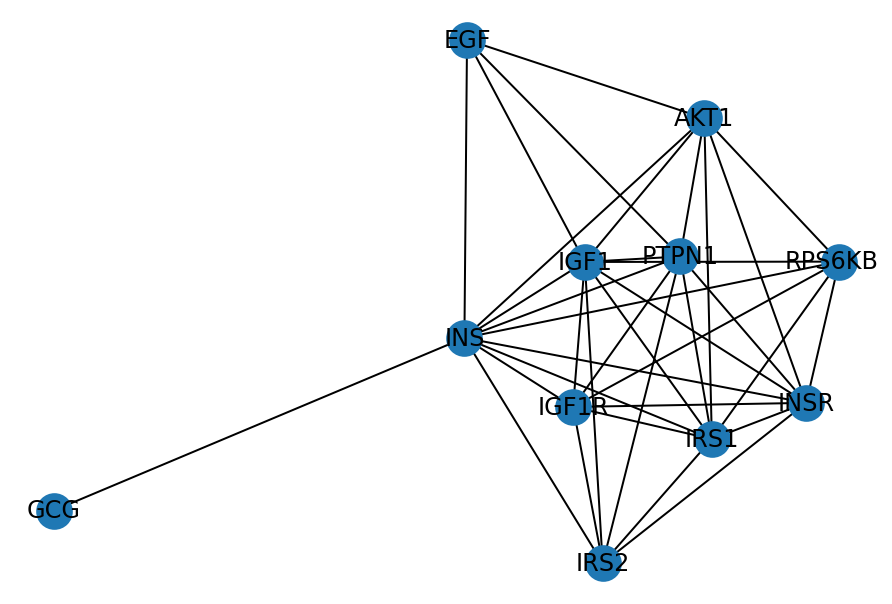

In [8]:
#%load solutions/ex2_1c.py
nx.draw(G, with_labels=True)

#### 1.d. List the neighbors of 'AKT1'

In [9]:
# %load solutions/ex2_1d.py
list(G.neighbors('AKT1'))

['INS', 'RPS6KB1', 'PTPN1', 'IRS1', 'IGF1', 'INSR', 'EGF']

#### 1.e. Draw subnetwork for the protein 'AKT1'

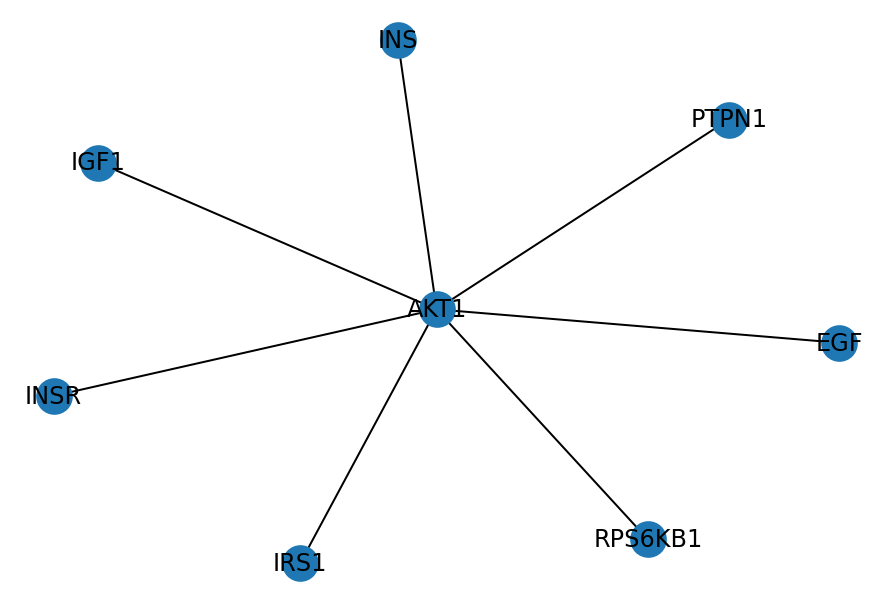

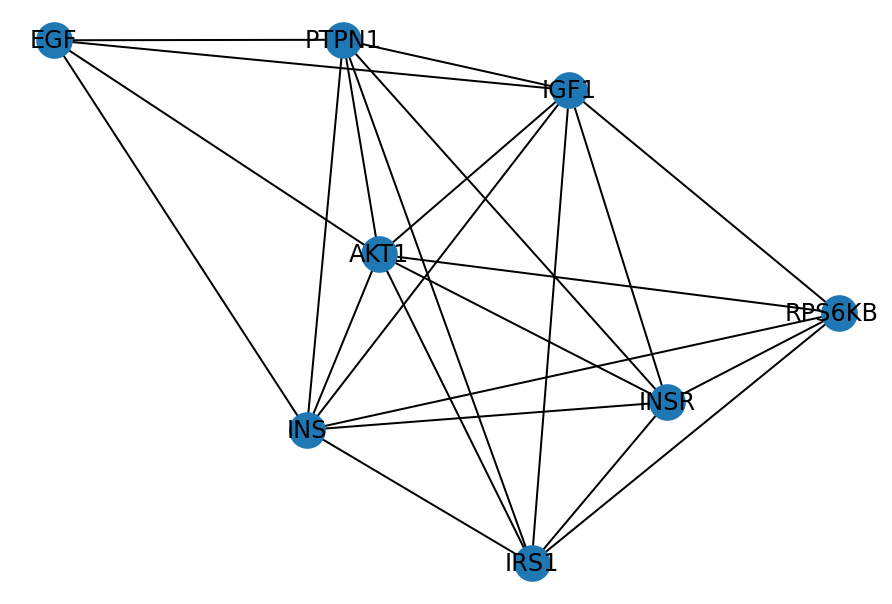

In [10]:
# %load solutions/ex2_1e.py

# we use the same function from 1_network_graphs_students
def extract_subgraph(G, node):
    new_G = nx.Graph()
    for neighbor in G.neighbors(node):
        new_G.add_edge(node, neighbor)
    return new_G

# then plot
akt1_G = extract_subgraph(G, 'AKT1')
nx.draw(akt1_G, with_labels=True)
plt.show()


# alternatively you could display the edges between AKT1's neighbors too
nx.draw(G.subgraph(akt1_G.nodes), with_labels=True)

#### 1.f. Rank top 5 proteins with the highest centrality 

In [11]:
# %load solutions/ex2_1f.py

# same approach as in the previous notebook
degs = sorted(G.degree, key=lambda item:item[1], reverse=True)
degs[:5]

[('INS', 10), ('IGF1', 9), ('INSR', 8), ('IRS1', 8), ('PTPN1', 8)]

#### 1.g. plot the network, but the size of the nodes proportional to their degree centrality (high centrality=bigger).

Use the arguments `nodelist` and `node_size` in `nx.draw`. The order have to match!

['AKT1', 'EGF', 'GCG', 'IGF1', 'IGF1R', 'INS', 'INSR', 'IRS1', 'IRS2', 'PTPN1', 'RPS6KB1']
[560, 320, 80, 720, 560, 800, 640, 640, 480, 640, 480]


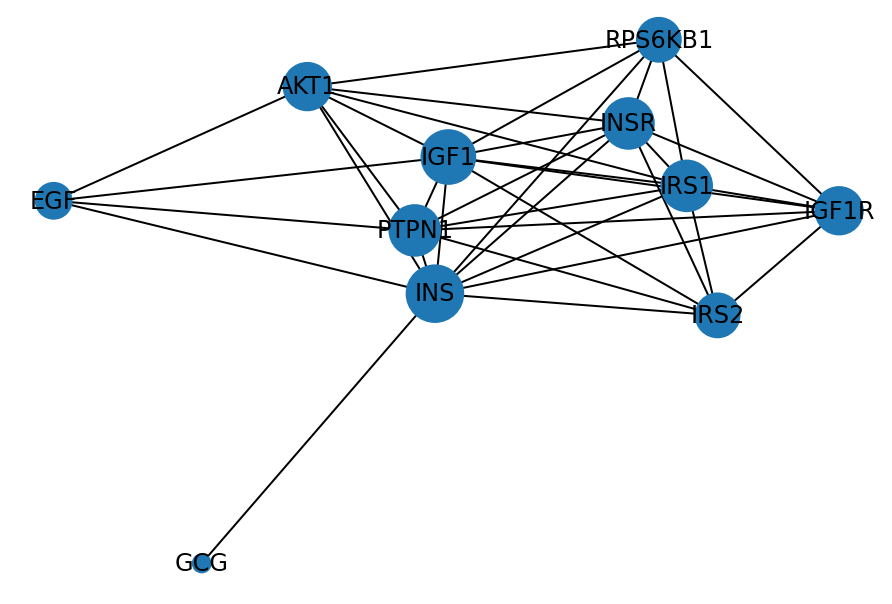

In [12]:
# load solutions/ex2_1g.py
scl = 80 # scaling factor for plotting

# we have to pass in a list of the 
d = dict(G.degree)

nl = list(d.keys()) #only the nodes
print(nl)

sz = [v*scl for v in d.values()] #only their degree (scaled up)
print(sz)

# now we have successfully split them into 2, with matching order
nx.draw(G, nodelist=nl, node_size=sz, with_labels=True)


In [16]:
ds = dict(G.degree).values()


We plot a empirical cumulative density function (ECDF), like in notebook 1. 

#### Exercise 2. What does the shape of the curve tell you? (answer in words)

Text(0.5, 1.0, 'Degree Centralities')

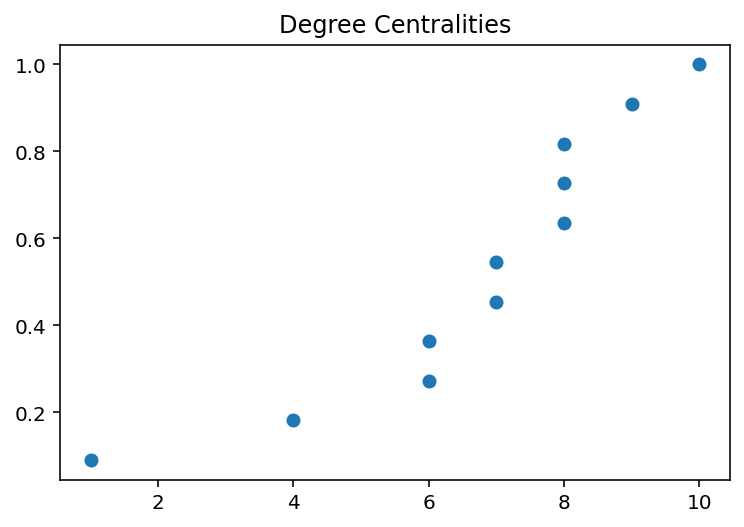

In [17]:
ecdf = ECDF(list(ds))
x,y = ecdf.x, ecdf.y

plt.scatter(x,y)
plt.title('Degree Centralities')

In [18]:
# %load solutions/ex2_2.py

# the vast majority of nodes have a high degree centrality (because it grows steepest from 6-8)


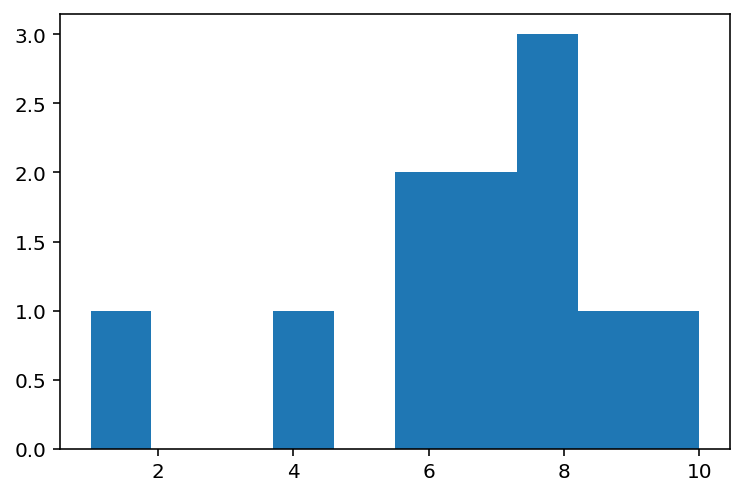

In [19]:
plt.hist(ds)
plt.show()

# Plotting networks

Visualization of networks in more than just flashy display - but is an integral part for scientists to inspect the phenomenon in question. We will now look deeper into how to do this for an example network.



### Layout and directions

Now we wants to look at different layout and include directions on the edges.

First we draw a standard graph from our data:

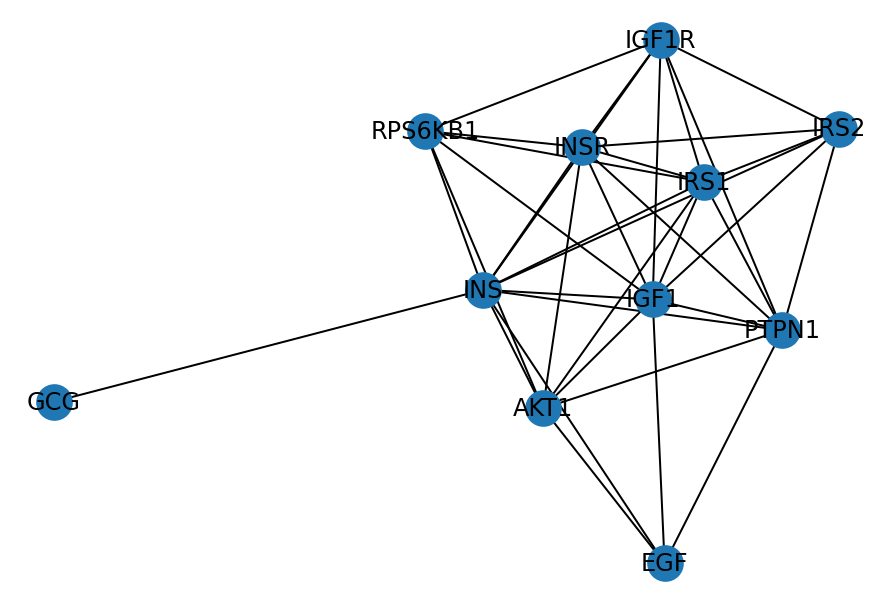

In [21]:
nx.draw(G, with_labels=True)
plt.show()

## Topological versus physical space
Most networks do not "exist" in physical space (e.g. a protein interaction network is an abstract network, while an air travel network has nodes fixed in physical space). But all networks can be said to exist in **topological** space, but the position of the nodes are only a feature of how *we* decide to plot them, not a property of the network itself. A certain layout may simplify the graph and make it easier to analyse and interpret, for example by plotting interacting nodes closer together. We can choose between dozens of different layout algorithms. Here we start by applying the Fruchterman Reingold layout algorithm, which is a force-directed layout.

In [25]:
pos = nx.fruchterman_reingold_layout(G)

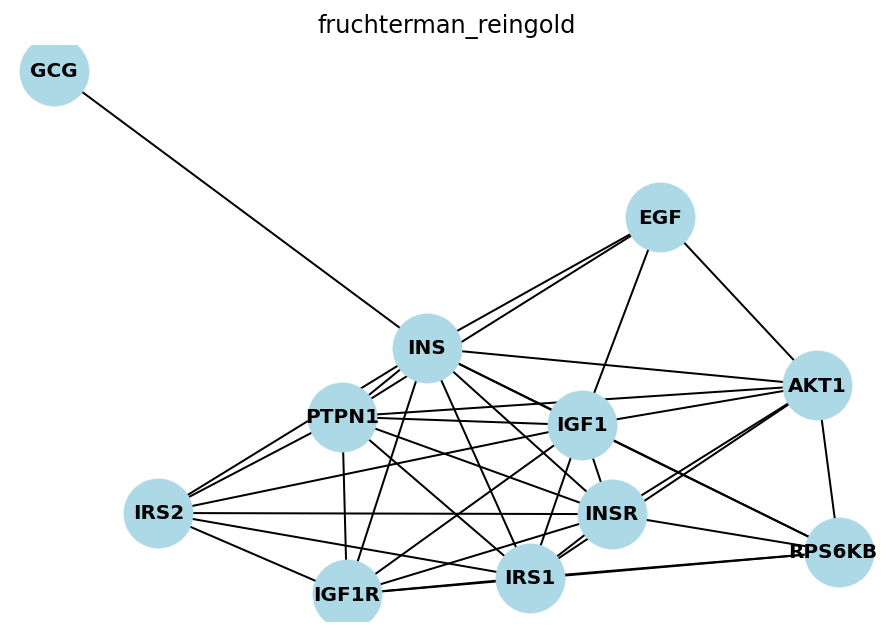

In [26]:
# Fruchterman Reingold
nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, pos=pos)


plt.title("fruchterman_reingold")
plt.show()

You can also try out some of the other layout options in Networkx. Instead of Fruchterman_Reingold try circular, random and spectral.

In [29]:
def plot_graph(G, layout):
    nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, pos=layout(G))
    plt.title(layout.__name__)
    plt.show()

#### Exercise 3. try out the 3 different layouts from `nx`: circular, random and spectral.

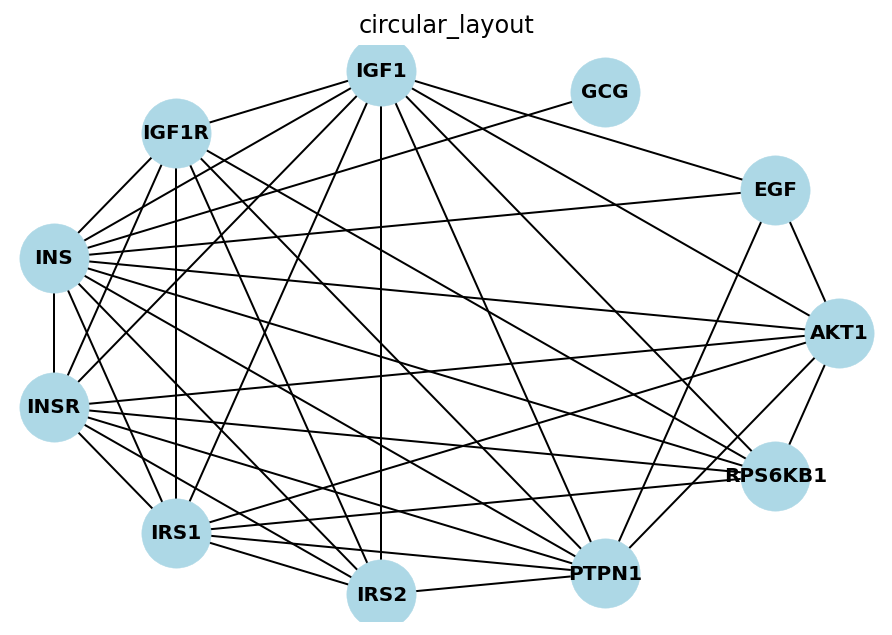

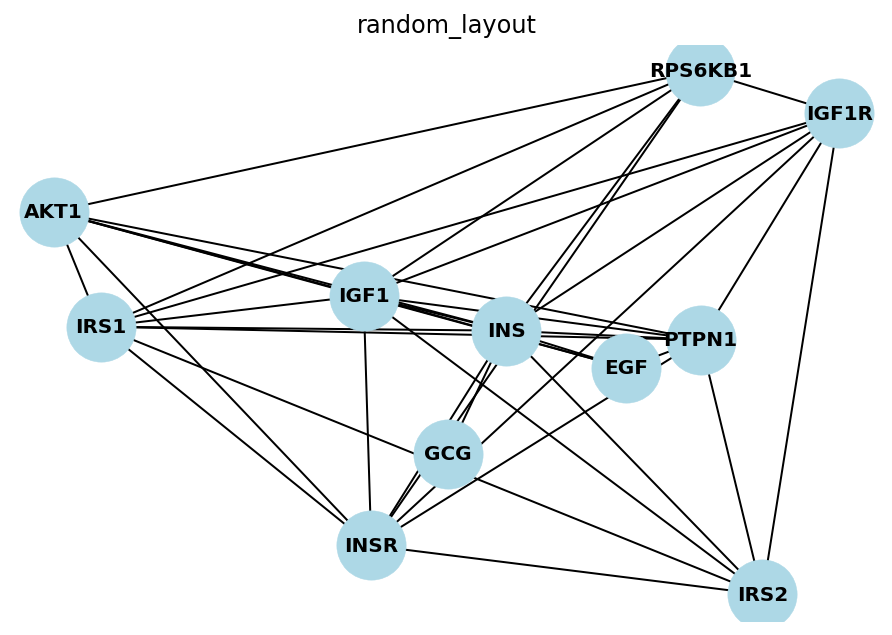

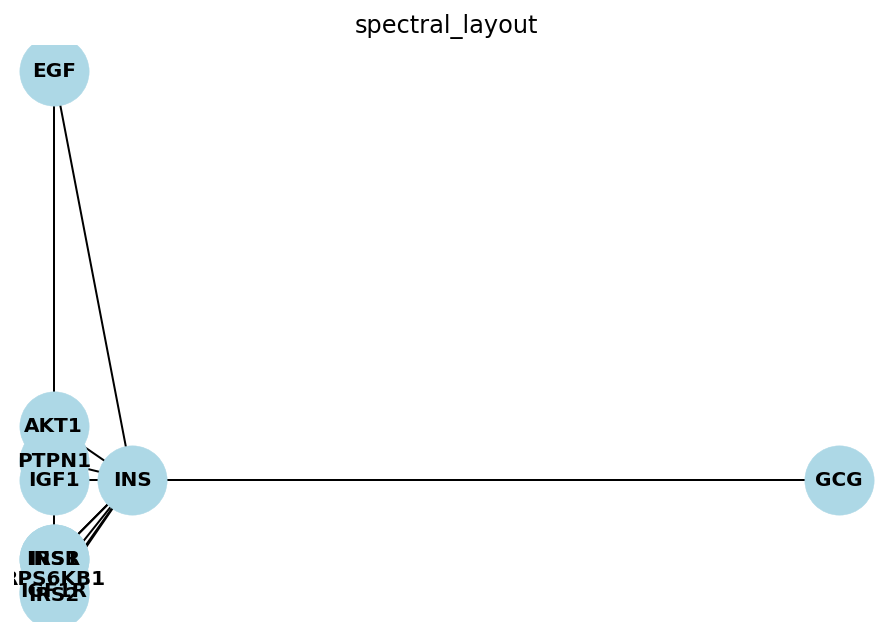

In [30]:
# load solutions/ex2_3.py
for layout in [nx.circular_layout, nx.random_layout, nx.spectral_layout]:
    plot_graph(G, layout)

In the graphs we have made so far, the direction of the edges were not given. If Mads was playing with Anna, then Anna was also playing with Mads. If instead we are dealing with situations were e.g. a protein activate another protein, we would like to add a direction on the relationship - going from the activating protein towards the activated protein. We do that by making a directed graph.

In networkx we use the command nx.DiGraph() to indicate that we now want to make a directed graph. 

Be aware that one edge can go in both directions, indicated by an arrow in both ends of the edge.

In [39]:
node_names = [n for n in G.nodes]
node_names

['AKT1',
 'EGF',
 'GCG',
 'IGF1',
 'IGF1R',
 'INS',
 'INSR',
 'IRS1',
 'IRS2',
 'PTPN1',
 'RPS6KB1']

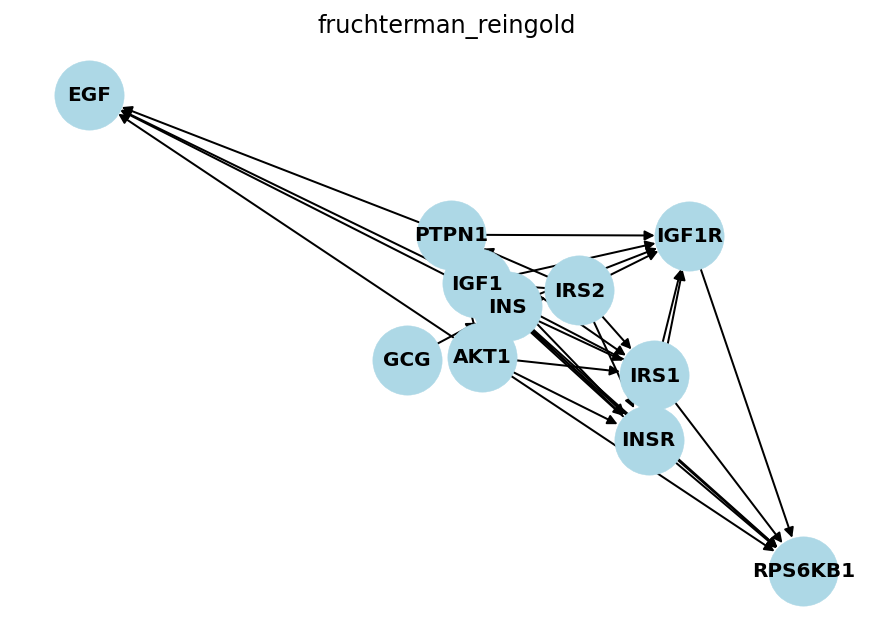

In [41]:
G = nx.DiGraph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()


#### Exercise 4: Now, try to make a directed network with a circular layout, green nodes and where the labels have a white font. 

Text(0.5, 1.0, 'circular')

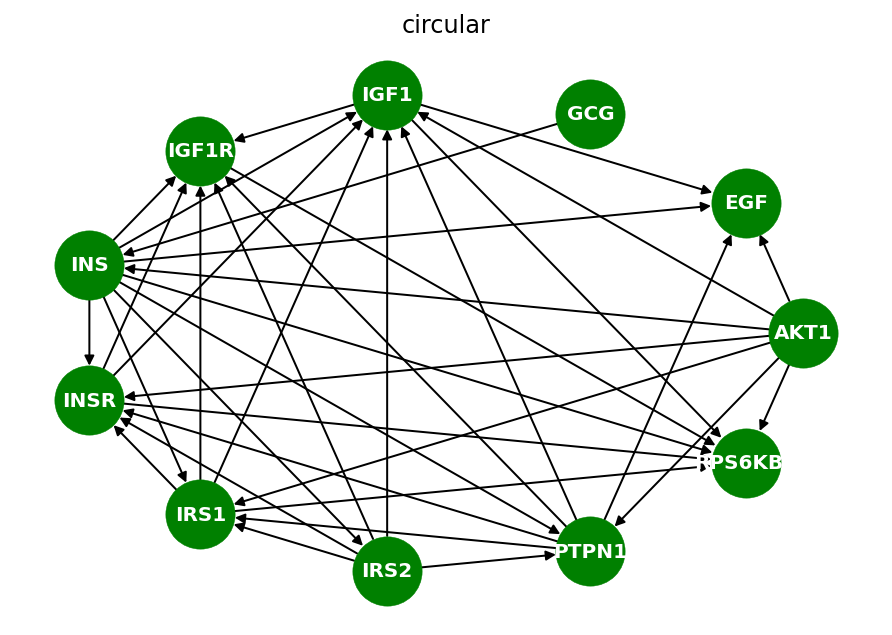

In [52]:
# %load solutions/ex2_4.py
nx.draw(G, node_size=1200, node_color='green', font_color='white',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, pos=nx.circular_layout(G))
plt.title("circular")

###  Density, shortest paths and betweenness centrality

We will now introduce a few more terms related to graphs and show how networks can be represented as a plot instead of a graph. 

We start by calculation of the density of the network. Whereas the centrality is connected to the individual nodes, the density is related to the network and describes the portion of the potential connections in a network that are actual connections, i.e. how many of the potential edges are given in the network. For this network we will see that around one sixth of all the potential connections are actually given in the network.

#### Exercise 5. Calculate the density of G

In [53]:
# %load solutions/ex2_5.py
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
n_possible_edges = n_nodes**2 - n_nodes #subtract the diagonal because self-connections are not allowed
print(n_edges/n_possible_edges)

0.33636363636363636


Usually we find that there is a method that will do what we are looking for:

In [54]:
nx.density(G)

0.33636363636363636

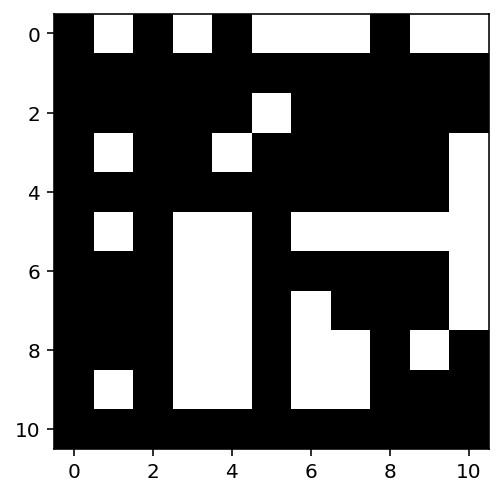

In [55]:
# do you agree that about 1/3 of the squares are white?
npg = nx.to_numpy_array(G)
plt.imshow(npg, cmap='gray')

We can also study the paths through the network. Often we will be most interested in finding the shortest path between two nodes, e.g. the shortest way that a signal can travel from one protein to another. E.g. the shortest path from GCG to EGF. 

In [56]:
nx.shortest_path(G, 'GCG', 'EGF')

['GCG', 'INS', 'EGF']

# Disease networks

Let's now move on to a related concept to PP networks: the human disease network. Is there a way to view diseases as nodes and connect them based on some similarity? 

We start with data from OMIM: a database of genes linked to known disorders through experimental evidence.

In [421]:
hdn = {
'Ataxia-telangiectasia': ['ATM'],
'Perineal hypospadias': ['AR'],
'Androgen insensitivity': ['AR'],
'T-cell lymphoblastic leukemia': ['ATM'],
'Papillary serous carcinoma': ['BRCA1'],
'Prostate cancer': ['AR','BRCA2','CHEK2','MAD1L1'],
'Ovarian cancer': ['CDH1', 'BRCA1', 'MSH2', 'PIK3CA'],
'Lymphoma': ['ATM','MSH2','MAD1L1','RAD54L'],
'Breast cancer': ['ATM','BRCA1','BRCA2','CDH1','KRAS','PIK3CA','TP53','RAD54L','CHEK2','BRIP1'],
'Pancreatic cancer': ['BRCA2','KRAS','TP53'],
'Wilms tumor': ['BRCA2'],
'Spinal muscular atropy': ['AR','GARS','HEXB','VAPB','BSCL2'],
'Sandhoff disease': ['HEXB'],
'Lipodystrophy': ['LMNA', 'BSCL2'],
'Charcot-Marie-Tooth disease': ['LMNA','GARS'],
'Amyotrophic lateral sclerosis': ['VAPB','ALS2'],
'Silver spastic paraplegia syndrome': ['BSCL2'],
'Spastic ataxia/paraplegia': ['ALS2'],
'Fanconi anemia': ['BRIP1','BRCA2']
}

G = nx.from_dict_of_lists(hdn)

Here we must emphasize that we have 2 classes of node: gene/protein and disease. Let's encode it

In [422]:
attrs = np.repeat('disease', G.number_of_nodes())
for i,v in enumerate(G.nodes()):
    if v.isupper(): attrs[i] = 'gene'

In [423]:
attrs = dict([*zip(G.nodes(), attrs)])
attrs

{'Ataxia-telangiectasia': 'disease',
 'Perineal hypospadias': 'disease',
 'Androgen insensitivity': 'disease',
 'T-cell lymphoblastic leukemia': 'disease',
 'Papillary serous carcinoma': 'disease',
 'Prostate cancer': 'disease',
 'Ovarian cancer': 'disease',
 'Lymphoma': 'disease',
 'Breast cancer': 'disease',
 'Pancreatic cancer': 'disease',
 'Wilms tumor': 'disease',
 'Spinal muscular atropy': 'disease',
 'Sandhoff disease': 'disease',
 'Lipodystrophy': 'disease',
 'Charcot-Marie-Tooth disease': 'disease',
 'Amyotrophic lateral sclerosis': 'disease',
 'Silver spastic paraplegia syndrome': 'disease',
 'Spastic ataxia/paraplegia': 'disease',
 'Fanconi anemia': 'disease',
 'ATM': 'gene',
 'AR': 'gene',
 'BRCA1': 'gene',
 'BRCA2': 'gene',
 'CHEK2': 'gene',
 'MAD1L1': 'gene',
 'CDH1': 'gene',
 'MSH2': 'gene',
 'PIK3CA': 'gene',
 'RAD54L': 'gene',
 'KRAS': 'gene',
 'TP53': 'gene',
 'BRIP1': 'gene',
 'GARS': 'gene',
 'HEXB': 'gene',
 'VAPB': 'gene',
 'BSCL2': 'gene',
 'LMNA': 'gene',
 'ALS2

In [424]:
nx.set_node_attributes(G, values=attrs, name='type')

Because we have 2 node classes, and they are connected such that there only exist between-class edges, we are dealing with a bipartite graph:

In [426]:
nx.is_bipartite(G)

True

Let's see if plotting it can help us understand

In [436]:
# identify gene nodes and disease nodes 

genes = [v for (v,ty) in \
    nx.get_node_attributes(G,'type').items() if ty == 'gene']

diseases = [v for (v,ty) in \
    nx.get_node_attributes(G,'type').items() if ty == 'disease']

In [442]:
pos = nx.spring_layout(G, seed=8)

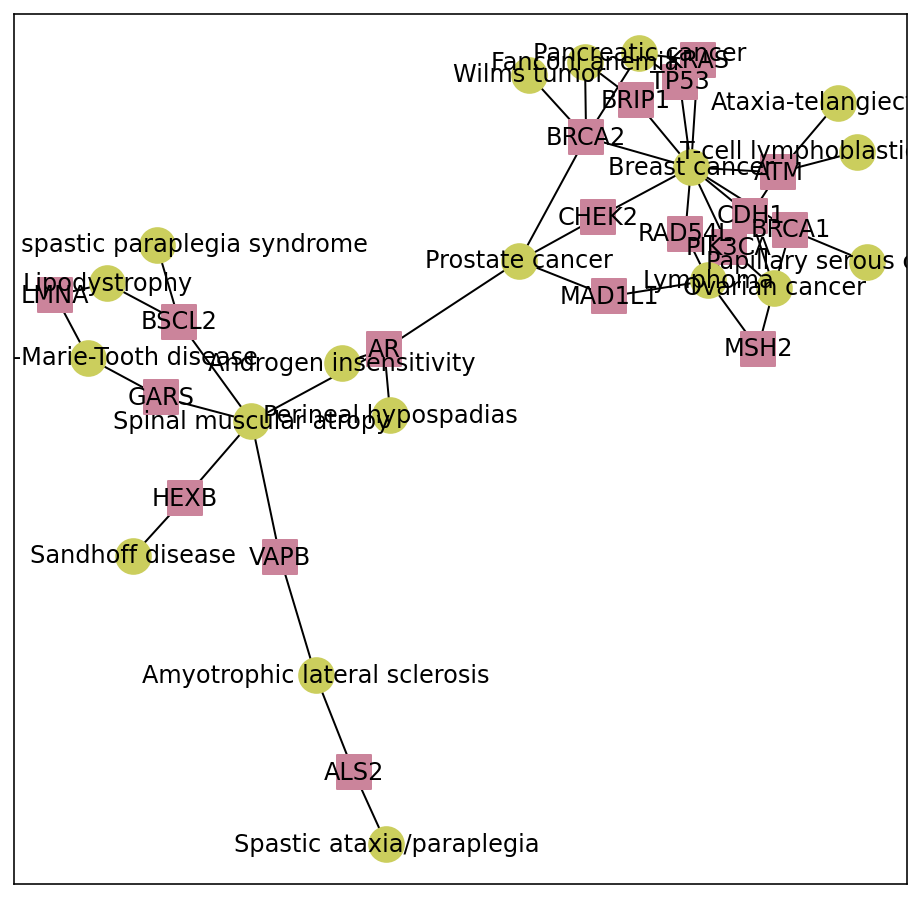

In [443]:
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(G, pos, nodelist=genes, \
    node_color='#cb849b', node_shape='s')

nx.draw_networkx_nodes(G, pos, nodelist=diseases, \
    node_color='#cbce5d', node_shape='o')

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G,pos)
plt.show()

Or more explicitly we can impose a bipartite layout

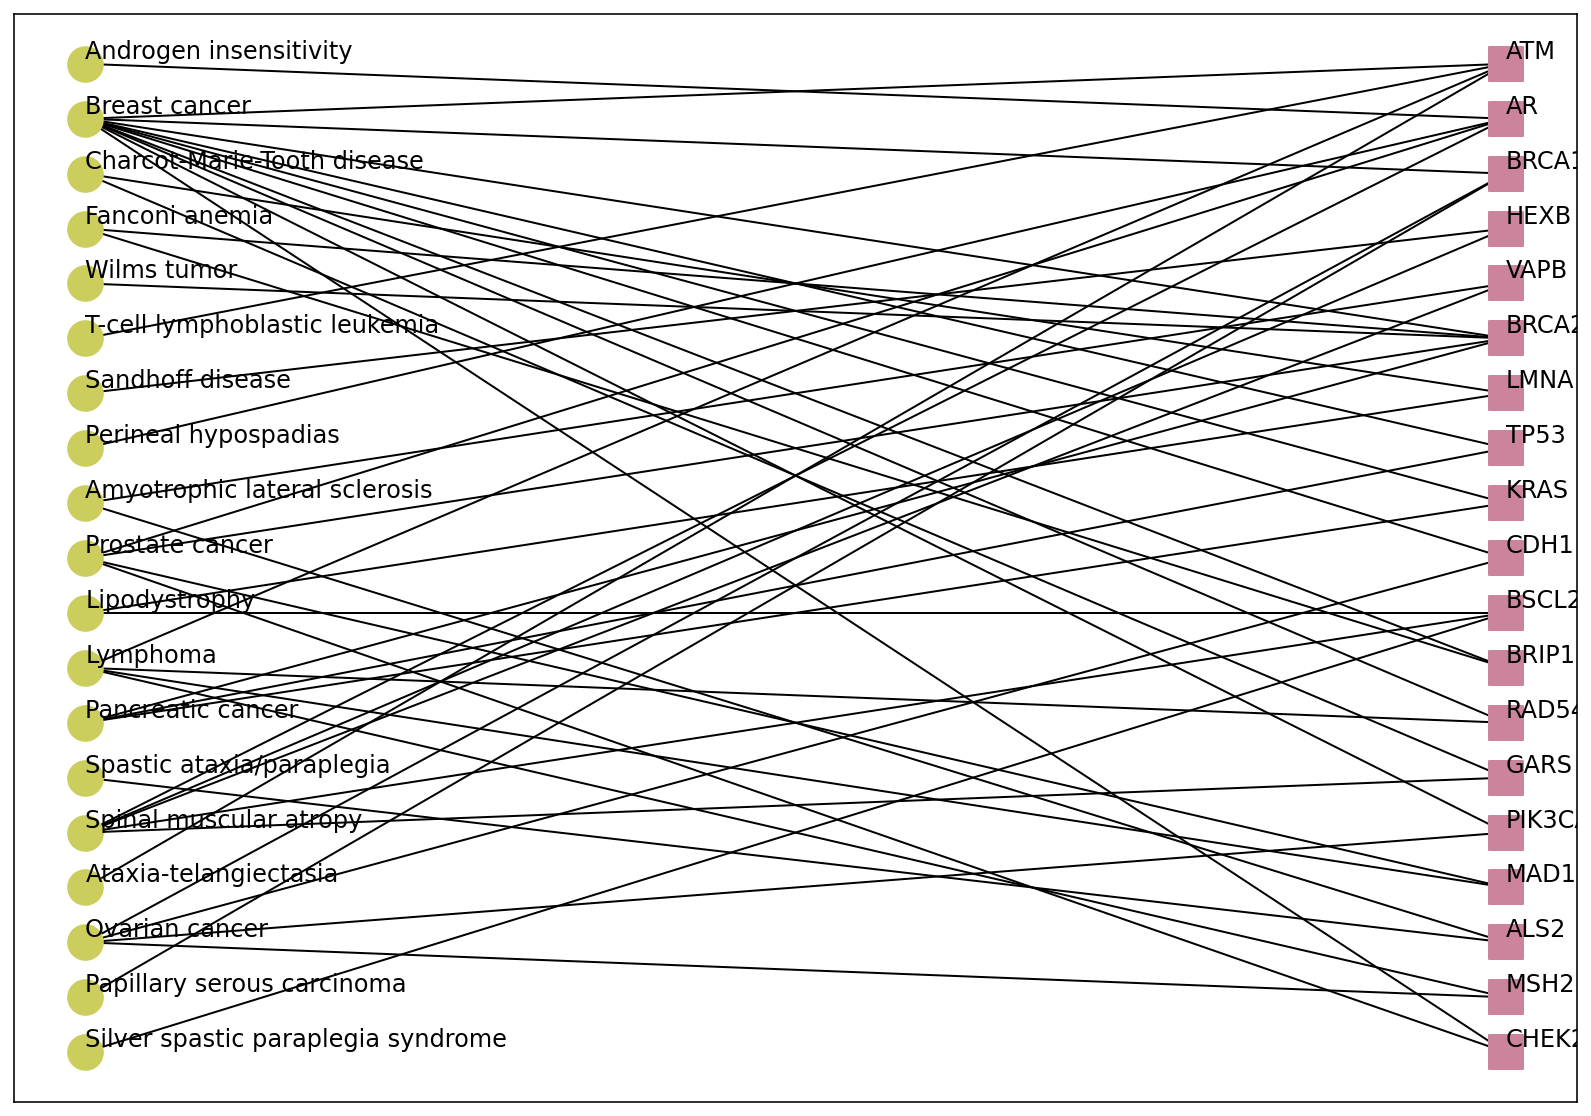

In [444]:
pos = nx.bipartite_layout(G, diseases)

plt.figure(figsize=(14,10))
nx.draw_networkx_nodes(G, pos, nodelist=genes, \
    node_color='#cb849b', node_shape='s')

nx.draw_networkx_nodes(G, pos, nodelist=diseases, \
    node_color='#cbce5d', node_shape='o')

nx.draw_networkx_edges(G, pos)

nx.draw_networkx_labels(G, pos, horizontalalignment='left', verticalalignment='bottom')

plt.show()

If we did this for the complete set of diseases, we would refer to it as the *diseaseome*. But it is not very helpful as a visual guide, as it is difficult to trace the edges. We can instead transform the graph into a different graph of only *one* sub class using a simple rule: if the jump count between them is no more than 2, make a connection. This is equivalent to saying: if two diseases share a gene, make an edge. This is what we call a *disease network*.

In [450]:
def graph_from_bipartite(G, subset):
    H = nx.Graph()
    for v in subset:
        new_nbs = set() # set avoid duplicates
        for nb in G.neighbors(v):
            new_nbs.update([*G.neighbors(nb)]) #add to set
        for nnb in new_nbs: H.add_edge(v, nnb)
    return H
        
HDN = graph_from_bipartite(G, diseases)

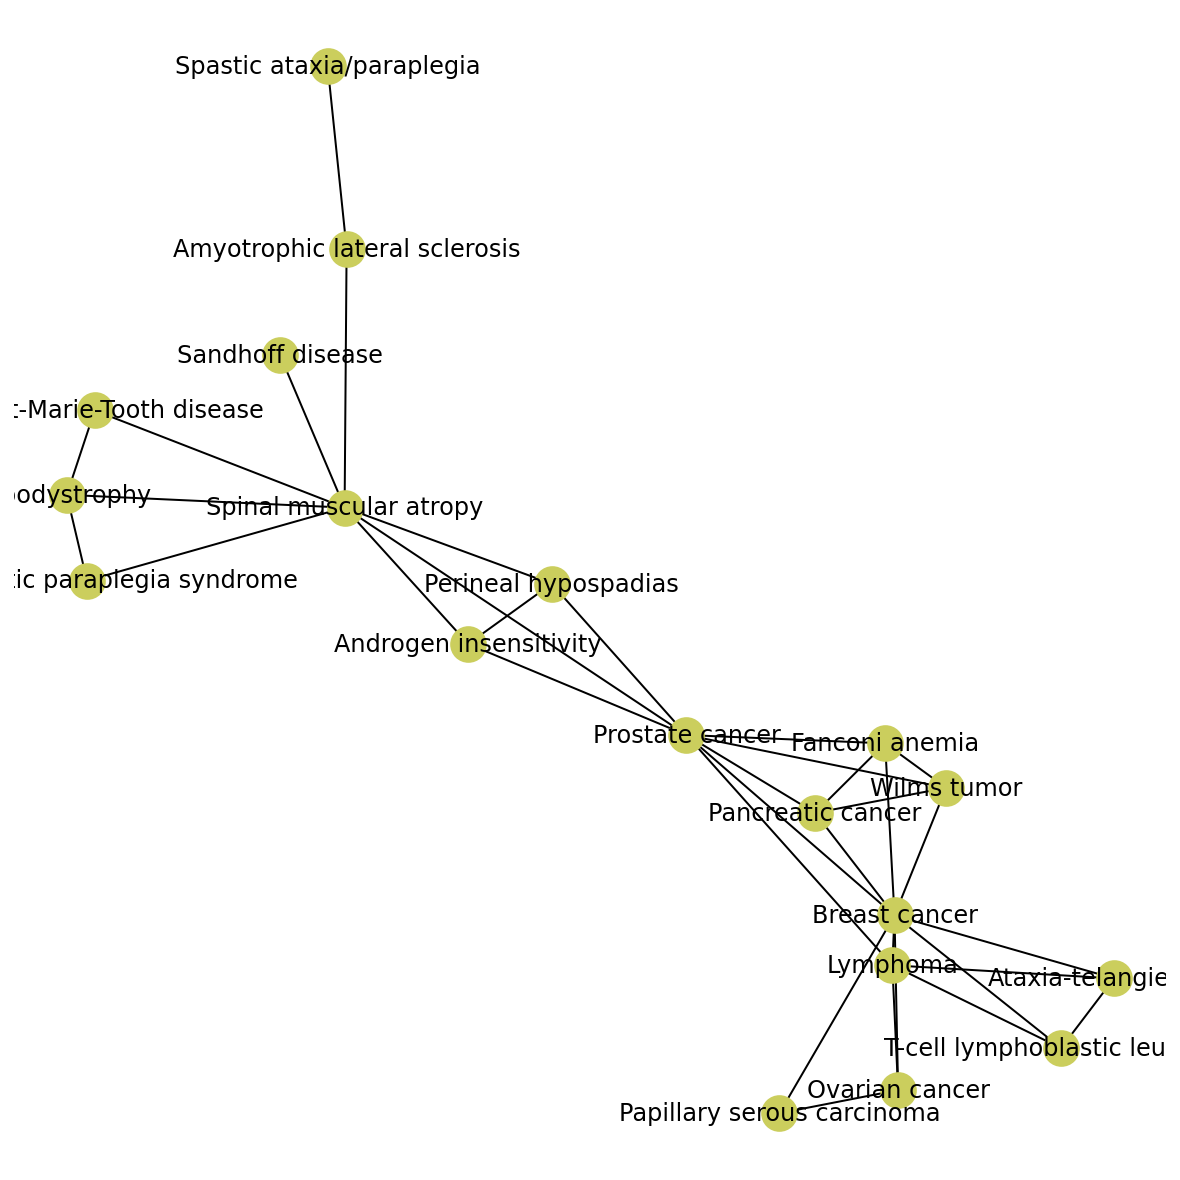

In [455]:
pos = nx.spring_layout(HDN, seed=4)
plt.figure(figsize=(8,8))
nx.draw(HDN, pos=pos, with_labels=True, node_color='#cbce5d')

Now you should observe something much more interesting: diseases of similar phenotype cluster together! We can make this even more clear by adding some predefined categories.

In [456]:
disease_classes = {
'Ataxia-telangiectasia': 'unkn',
'Perineal hypospadias': 'endocrine',
'Androgen insensitivity': 'endocrine',
'T-cell lymphoblastic leukemia': 'cancer',
'Papillary serous carcinoma': 'cancer',
'Prostate cancer': 'cancer',
'Ovarian cancer': 'cancer',
'Lymphoma': 'cancer',
'Breast cancer': 'cancer',
'Pancreatic cancer': 'cancer',
'Wilms tumor': 'cancer',
'Spinal muscular atropy': 'muscular',
'Sandhoff disease': 'lipid',
'Lipodystrophy': 'lipid',
'Charcot-Marie-Tooth disease': 'neuro' ,
'Amyotrophic lateral sclerosis': 'neuro',
'Silver spastic paraplegia syndrome': 'neuro',
'Spastic ataxia/paraplegia': 'neuro',
'Fanconi anemia': 'cardiovascular'
}

In [457]:
nx.set_node_attributes(HDN, disease_classes, name='disease_class')

In [449]:
# Map each class to a different color
ids = set(hash(a) for a in disease_classes.values())
cmap = dict(zip(ids, 'rkbygcb'))
colors = [cmap[hash(d)] for d in disease_classes.values()]

In [458]:
print(colors)
#nx.set_node_attributes(HDN, values=dict(zip(disease_classes.keys(), colors)), name='color')
#colors = dict(zip(HDN.nodes(), colors))
#colors

['c', 'y', 'y', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'g', 'g', 'k', 'k', 'k', 'k', 'b']


In [463]:
ids

['unkn',
 'cancer',
 'cancer',
 'cancer',
 'endocrine',
 'cancer',
 'muscular',
 'endocrine',
 'cancer',
 'cancer',
 'cardiovascular',
 'cancer',
 'cancer',
 'neuro',
 'neuro',
 'lipid',
 'lipid',
 'neuro',
 'neuro']

In [466]:
# map from class to color
node_color = nx.get_node_attributes(HDN, 'disease_class')
ids = set(a for a in node_color.values()) # avoid duplicates
cmap = dict(zip(ids, 'mkcygrb'))
node_color = [cmap[d] for d in node_color.values()]

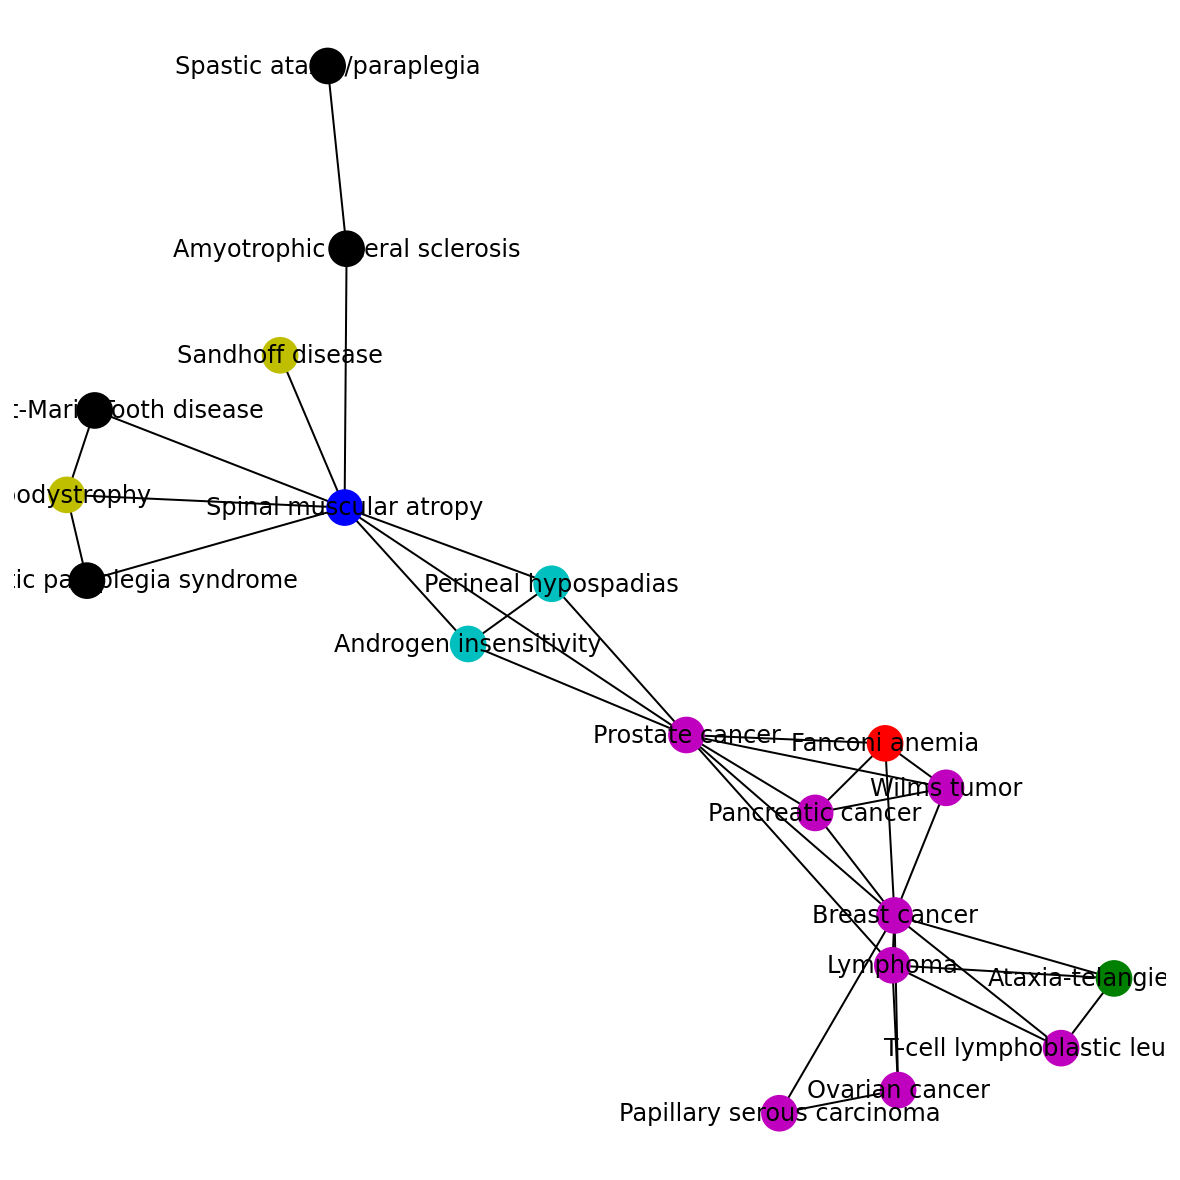

In [467]:
plt.figure(figsize=(8,8))
nx.draw(HDN, pos=pos, with_labels=True, node_color=node_color)

## Making interactive plots

We have improved quite a bit from the first plot we did, but still it would be very helpful to move around, zoom in and out, maybe display some information of interest when hovering a given node. This is what `Plotly` is for.


In [ ]:
# https://plotly.com/python/v3/igraph-networkx-comparison/
# https://dash.plotly.com/cytoscape
# https://www.kaggle.com/anand0427/network-graph-with-at-t-data-using-plotly
# https://github.com/plotly/dash-cytoscape

# Visualizing the human disease network

Here we will load a gml file,  which has been processed similarly to above, but for a larger dataset, and display the results.

Credit to [Empet](https://github.com/empet) for the code below

In [43]:
# Disease network OMIM
# https://www.pnas.org/content/104/21/8685
#https://nbviewer.jupyter.org/github/empet/Human-Disease-Network/blob/master/Human-Disease-Network.ipynb

In [44]:
import urllib

In [45]:
url = "https://raw.githubusercontent.com/empet/Human-Disease-Network/master/human-disease.gml"
urllib.request.urlretrieve(url, 'data/human-disease.gml')

('data/human-disease.gml', <http.client.HTTPMessage at 0x7fc5314fc5e0>)

In [13]:
import sys

In [15]:
#!conda install --yes --prefix {sys.prefix} plotly
#!{sys.executable} -m pip install python-igraph

In [1]:
import platform
import plotly
import igraph as ig
import numpy as np
import ast
#from  chart_studio.plotly import iplot
import plotly.graph_objs  as go
import plotly.io as pio

In [2]:
K = ig.Graph.Read_GML('data/human-disease.gml')

In [4]:
import networkx as nx

In [10]:
K.get_edgelist()

[(380, 509),
 (29, 224),
 (196, 199),
 (199, 200),
 (51, 52),
 (52, 53),
 (138, 139),
 (138, 140),
 (138, 141),
 (138, 142),
 (138, 143),
 (193, 194),
 (193, 195),
 (150, 193),
 (228, 229),
 (228, 230),
 (40, 228),
 (228, 231),
 (228, 232),
 (228, 233),
 (228, 234),
 (132, 281),
 (37, 305),
 (272, 273),
 (272, 274),
 (271, 272),
 (272, 275),
 (272, 276),
 (40, 90),
 (90, 91),
 (90, 92),
 (43, 90),
 (90, 183),
 (88, 90),
 (90, 381),
 (90, 172),
 (38, 39),
 (38, 40),
 (38, 41),
 (38, 42),
 (38, 43),
 (38, 44),
 (38, 39),
 (39, 40),
 (39, 41),
 (39, 42),
 (39, 43),
 (39, 44),
 (17, 18),
 (359, 405),
 (405, 406),
 (405, 407),
 (286, 405),
 (12, 257),
 (46, 222),
 (222, 223),
 (121, 222),
 (15, 25),
 (25, 26),
 (344, 379),
 (289, 290),
 (85, 289),
 (56, 289),
 (289, 291),
 (81, 258),
 (82, 258),
 (20, 294),
 (71, 72),
 (0, 54),
 (0, 33),
 (0, 55),
 (0, 46),
 (0, 56),
 (0, 173),
 (0, 31),
 (0, 28),
 (0, 174),
 (0, 349),
 (0, 374),
 (0, 19),
 (0, 375),
 (0, 327),
 (0, 411),
 (46, 477),
 (477,

In [ ]:
K

In [12]:
G = nx.from_edgelist(K.get_edgelist())

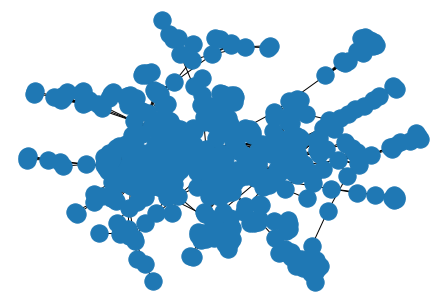

In [13]:
nx.draw(G)

In [17]:
def get_graph_components(G, ret=False):
    comp = G.components()
    if ret:
        return comp, len(comp)
    else:
        return len(comp)

In [18]:
d_classes = list(set([v['disclass'] for v in K.vs]))
disorder_classes = sorted(d_classes)

#Basic information on the graph K:

print ('Number of vertices: ', len(K.vs), '\nNumber of edges: ', len(K.es),
       '\nDisorder classes: ', len(disorder_classes),
       '\nNumber of components: ', get_graph_components(K),
       '\n\nDisorder classes: ', disorder_classes)


#Disorder classes:  ['Bone', 'Cancer', 'Cardiovascular', 'Connective tissue disorder', 'Dermatological', 'Developmental', 'Ear,Nose,Throat', 'Endocrine', 'Gastrointestinal', 'Hematological', 'Immunological', 'Metabolic', 'Multiple', 'Muscular', 'Neurological', 'Nutritional', 'Ophthamological', 'Psychiatric', 'Renal', 'Respiratory', 'Skeletal', 'Unclassified']

#Let us compute the eigenvalue centrality of the disease network nodes:

v = K.evcent(directed=False)
centralities = np.array(v)
I = np.argsort(centralities)[::-1]

#Extract the top twenty diseases, according to their eigenvalue centralities:

top_20 = [K.vs[j]['label'] for j in I[:20]]
list(zip(top_20, np.sort(centralities)[::-1][:20]))


#Annotation text for data source:

annotation_text = "HDN: <a href='http://www.pnas.org/content/104/21/8685.full'> [1] </a>"+\
"  Data source:  <a href='https://github.com/empet/Human-Disease-Network/blob/master/human-disease.gml'> [2]</a>"  

#The following function extracts from the graph K, the data needed to plot it via Plotly:

def get_Plotly_netw(G, graph_layout,  title='Plotly Interactive Human Disease Network',
                    source=annotation_text, flip='lr', width=950, height=850):
    #G is an igraph.Graph instance
    #graph_layout is an igraph.Layout instance
    #title - the network title
    #flip is one of the strings 'lr', 'ud' to perform a pseudo-flip effect
    #the igraph.Layout is referenced to the screen system of coords, and is  upside-down flipped chonging the sign of y-coords
    #the global HDN looks better with the left-right  flipped layout, by changing the x-coords sign.
    #width and height are the sizes of the plot area
    
    graph_layout=np.array(graph_layout)
    
    if flip =='lr':
        graph_layout[:, 0] = -graph_layout[:,0]
    elif flip == 'ud':
        graph_layout[:, 1] = -graph_layout[:,1] 
    else: 
        raise ValueError('There is no such a flip type')
        
    m = len(G.vs)
    graph_edges = [e.tuple for e in G.es]# represent edges as tuples of end vertex indices
    
    Xn = [graph_layout[k][0] for k in range(m)]#x-coordinates of graph nodes(vertices)
    Yn = [graph_layout[k][1] for k in range(m)]#y-coordinates -"-
        
    Xe = []#list of edge ends x-coordinates
    Ye = []#list of edge ends y-coordinates
    for e in graph_edges:
        Xe.extend([graph_layout[e[0]][0],graph_layout[e[1]][0], None])
        Ye.extend([graph_layout[e[0]][1],graph_layout[e[1]][1], None]) 

    size = [vertex['size'] for vertex in G.vs]
    #define the Plotly graphical objects
    
    plotly_edges = go.Scatter(x=Xe,
                              y=Ye,
                              mode='lines',
                              line=dict(color='rgb(180,180,180)', width=0.75),
                              hoverinfo='none'
                       )
    plotly_vertices = go.Scatter(x=Xn,
                                 y=Yn,
                                 mode='markers',
                                 name='',
                                 marker=dict(symbol='circle-dot',
                                             size=size, 
                                             color=[vertex['color'] for vertex in G.vs], 
                                                    line=dict(color='rgb(50,50,50)', width=0.5)
                                                   ),
                                text=[f"{vertex['label']}<br>({vertex['disclass']})" for vertex in G.vs],
                                hoverinfo='text'
                   )
    
    #Define the Plotly plot layout:
    
    plotly_plot_layout = dict(title=title, 
                              width=width,
                              height=height,
                              showlegend=False,
                              xaxis=dict(visible=False),
                              yaxis=dict(visible=False), 
         
                              margin=dict(t=100),
                              hovermode='closest',
                              template='none',
                              paper_bgcolor='rgb(235,235,235)'
                                    )
    
    if source is not None:
        annotations = [dict(showarrow=False, 
                            text=source,  
                            xref='paper',     
                            yref='paper',     
                            x=0,  
                            y=-0.1,  
                            xanchor='left',   
                            yanchor='bottom',  
                            font=dict(size=14))]
    else:
        annotations = []
        
    disorder_name = [vertex['label'] for vertex in G.vs]
    for k, s in enumerate(size):
        if s>= 20:
            annotations.append(dict(text=disorder_name[k], 
                                    x=graph_layout[k][0], y=graph_layout[k][1],
                                    xref='x1', yref='y1',
                                    font=dict(color='rgb(50,50,50)', size=10),
                                    showarrow=False
                                   )
                                )
    
    plotly_plot_layout.update(annotations=annotations)
    return go.FigureWidget(data=[plotly_edges, plotly_vertices], layout=plotly_plot_layout)        

#Since the position of each node is recorded as a string, we convert it to a tuple of floats:

pos = [ast.literal_eval(v['position']) for v in K.vs]
HDN_layout = np.array(pos)

fig = get_Plotly_netw(K, HDN_layout)
#fig

Number of vertices:  516 
Number of edges:  2376 
Disorder classes:  22 
Number of components:  1 

Disorder classes:  ['Bone', 'Cancer', 'Cardiovascular', 'Connective tissue disorder', 'Dermatological', 'Developmental', 'Ear,Nose,Throat', 'Endocrine', 'Gastrointestinal', 'Hematological', 'Immunological', 'Metabolic', 'Multiple', 'Muscular', 'Neurological', 'Nutritional', 'Ophthamological', 'Psychiatric', 'Renal', 'Respiratory', 'Skeletal', 'Unclassified']


In [19]:
plotly.offline.iplot(fig, filename='Diseasome-Network')

The colors were added a priori from the disease class, but they only emphasize an already existing phenomenon: diseases cluster into modules.